## Random coin

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [9]:
def coin_flips(n):
    n = n
    heads = [random.uniform(0,1) for i in range(n)]
    heads = [1 if i > 0.5 else 0 for i in heads]
    flips = np.arange(1,n+1)
    proportion = (np.cumsum(heads)/flips)
    df = pd.DataFrame(
        {'flips': flips,
         'proportion_heads': proportion}
    )
    return df
    

In [10]:
n = 1000
coin_flips(n)

,flips,proportion_heads
0,1,0.000000
1,2,0.500000
2,3,0.333333
3,4,0.250000
4,5,0.200000
...,...,...
995,996,0.488956
996,997,0.488465
997,998,0.488978
998,999,0.489489


In [11]:
r1 = coin_flips(n)
r2 = coin_flips(n)
r3 = coin_flips(n)
r4 = coin_flips(n)

In [12]:
df = pd.concat([r1, r2, r3, r4], axis=0)
df

,flips,proportion_heads
0,1,1.000000
1,2,1.000000
2,3,1.000000
3,4,0.750000
4,5,0.600000
...,...,...
995,996,0.487952
996,997,0.488465
997,998,0.488978
998,999,0.489489


In [13]:
runs = ['run1']*n + ['run2']*n + ['run3']*n + ['run4']*n
df['runs'] = runs

/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


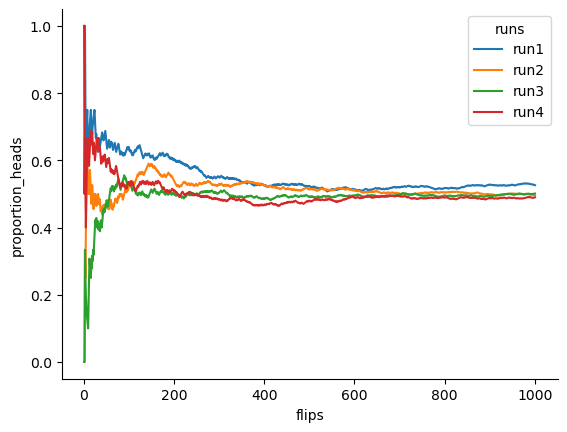

In [14]:
ax = sns.lineplot(data=df, x='flips', y='proportion_heads', hue='runs')
sns.despine()

In [16]:
import plotly.express as px
fig = px.line(df, x='flips', y='proportion_heads', color='runs')
fig.show();

In [18]:
for _ in range(20):
    print(np.random.choice((0,1), p=(0.4, 0.6)))

1
0
1
1
1
1
0
1
0
1
1
1
1
1
0
0
1
1
1
1


In [23]:
choices = [np.random.choice((0,1), p=(0.4, 0.6)) for _ in range(1000)]
np.mean(choices)

0.602

# Binomial Distribution

Discrete Distribution
$P(X|\theta ,N)$ where $\theta$ is the probability of success and $N$ is the number of tries.

### Skulls

20 dice with a skull on 1 side. What is the probability of exactly 4 skulls?

$N = 20$, $\theta = .167$

In [26]:
from scipy.stats import binom
N = 20
p = 1/6
r = list(range(0,21,1))

binom.pmf(r, N, p)


array([2.60840533e-02, 1.04336213e-01, 1.98238805e-01, 2.37886566e-01,
       2.02203581e-01, 1.29410292e-01, 6.47051460e-02, 2.58820584e-02,
       8.41166898e-03, 2.24311173e-03, 4.93484580e-04, 8.97244691e-05,
       1.34586704e-05, 1.65645174e-06, 1.65645174e-07, 1.32516139e-08,
       8.28225869e-10, 3.89753350e-11, 1.29917783e-12, 2.73511123e-14,
       2.73511123e-16])

In [28]:
binom.pmf([1,5,10],N,p)

array([0.10433621, 0.12941029, 0.00049348])

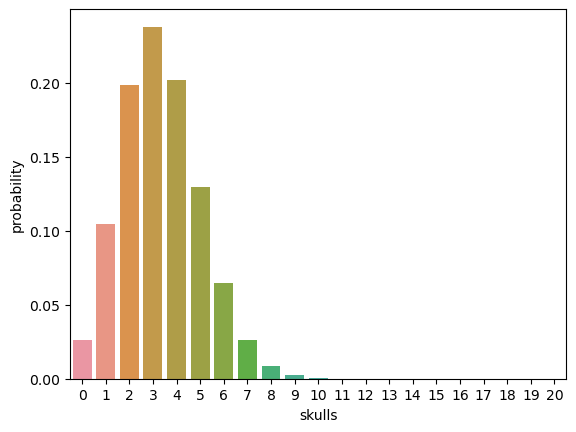

In [34]:
y = binom.pmf(r, N, p)
df = pd.DataFrame(
    {
        'probability': y,
        'skulls': np.arange(0,21,1),
    }
)

fig = sns.barplot(data=df, x='skulls', y='probability')

In [52]:
df['color'] = [str(i) for i in df.index]
fig = px.bar(df, x='skulls', y='probability', 
             color='color', range_color='seagreen', 
             text_auto=".2f")
fig.update_layout(showlegend=False)
fig.update_traces(textposition='outside')
fig.show();

`binom.pmf()`

- `k`: The number of success you are interested in.
- `n`: The number of attempts
- `p`: This is the success probability for any one trial in the experiment.


In [15]:
from scipy.stats import binom
p = binom.pmf(k=4, n=20, p=1/6)
print(f'The probability of rolling 4 skulls with 20 dice is {p:.4}')

The probability of rolling 4 skulls with 20 dice is 0.2022


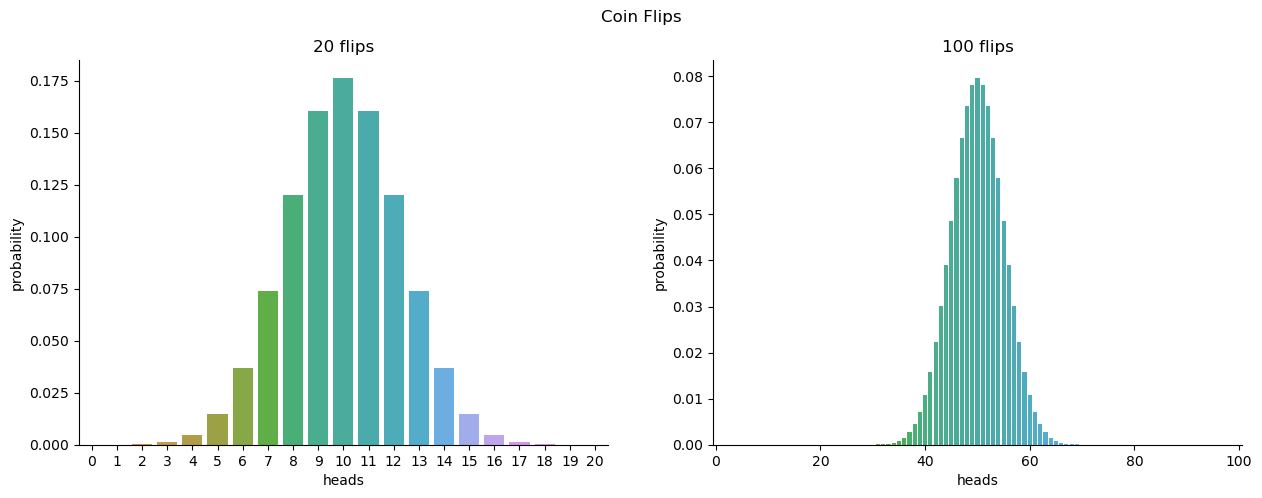

In [29]:
step = 1
n1 = 20
n2 = 100
r1 = list(range(0,21,step))
r2 = list(range(0,101,step))
p = .5
y1 = binom.pmf(r1, n1, p)
y2 = binom.pmf(r2, n2, p)
df1 = pd.DataFrame(
    {
        'probability': y1,
        'heads': r1
    }
)
df2 = pd.DataFrame(
    {
        'probability': y2,
        'heads': r2
    }
)
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Coin Flips')

axes[0].set_title('20 flips')
axes[1].set_title('100 flips')

ax1 = sns.barplot(x='heads', y='probability', data=df1, ax=axes[0])
ax2 = sns.barplot(x='heads', y='probability', data=df2, ax=axes[1])

ax2.set_xticks([0,20,40,60,80,100])
sns.despine()

# Normal Distribution

Continuous Distribution

/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


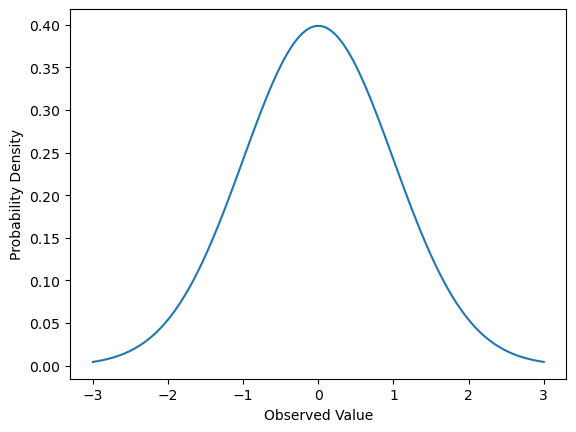

In [30]:
import scipy.stats as stats
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
fig = sns.lineplot(x=x, y=stats.norm.pdf(x, mu, sigma))
plt.xlabel('Observed Value')
plt.ylabel('Probability Density')
plt.show();

/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

<Axes: >

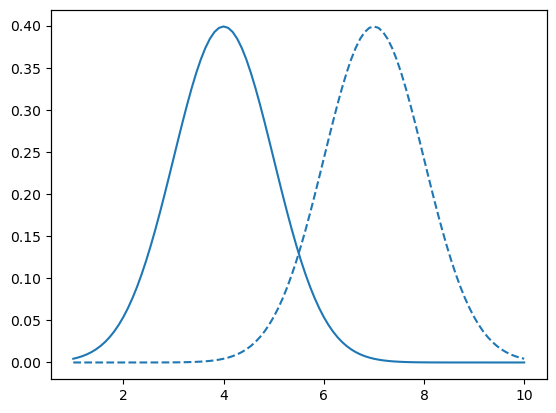

In [43]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(1, 10, 100)
y1 = stats.norm.pdf(x, 4, sigma)
y2 = stats.norm.pdf(x, 7, sigma)

fig = sns.lineplot(x=x, y=y1)

ax2 = fig.twinx()
ax2.tick_params(left=False, labelleft=False, 
                top=False, labeltop=False,
                right=False, labelright=False, 
                bottom=False, labelbottom=False)

sns.lineplot(x = x, y = y2, ax=ax2, linestyle='--')


<Axes: >

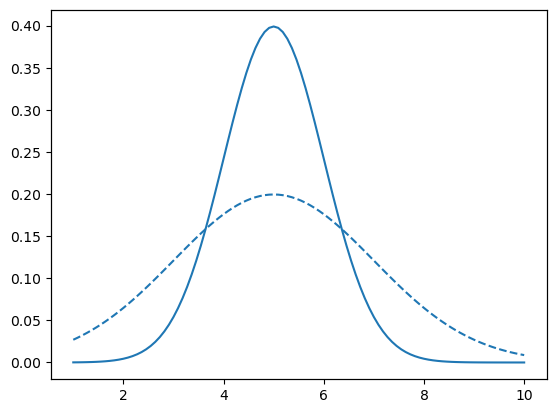

In [44]:
import warnings
warnings.filterwarnings('ignore')

mu = 5
x = np.linspace(1,10,100)
y1 = stats.norm.pdf(x, mu, 1)
y2 = stats.norm.pdf(x, mu, 2)

fig = sns.lineplot(x=x, y=y1)
ax2 = fig.twiny()
ax2.tick_params(left=False, labelleft=False, 
                top=False, labeltop=False,
                right=False, labelright=False, 
                bottom=False, labelbottom=False)
sns.lineplot(x=x, y=y2, ax=ax2, linestyle ='--')


[Text(0.5, 0, 'Observed value'), Text(0, 0.5, 'Probability density')]

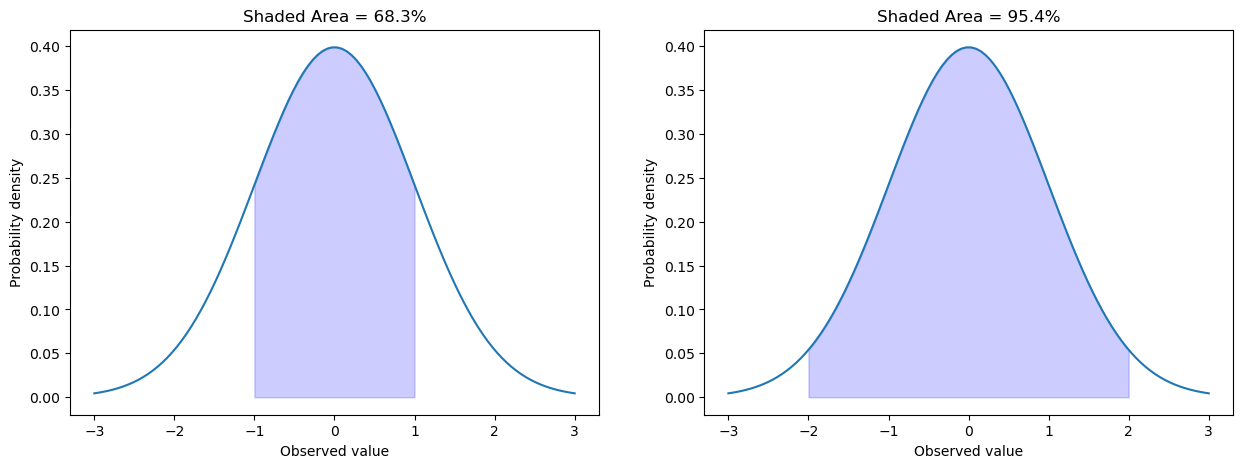

In [59]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
fig, axes = plt.subplots(1, 2, figsize=(15,5), sharey=False)
sns.lineplot(x=x, y=y, ax=axes[0])
sns.lineplot(x=x, y=y, ax=axes[1])

xf1 = np.arange(-sigma, sigma, 0.001)
xf2 = np.arange(-2*sigma, 2*sigma, 0.001)

yf1 = stats.norm.pdf(xf1, mu, sigma)
yf2 = stats.norm.pdf(xf2, mu, sigma)

axes[0].fill_between(xf1, yf1, alpha=0.2, color='blue')
axes[1].fill_between(xf2, yf2, alpha=0.2, color='blue')

axes[0].set_title("Shaded Area = 68.3%")
axes[1].set_title("Shaded Area = 95.4%")

axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')


[Text(0.5, 0, 'Observed value'), Text(0, 0.5, 'Probability density')]

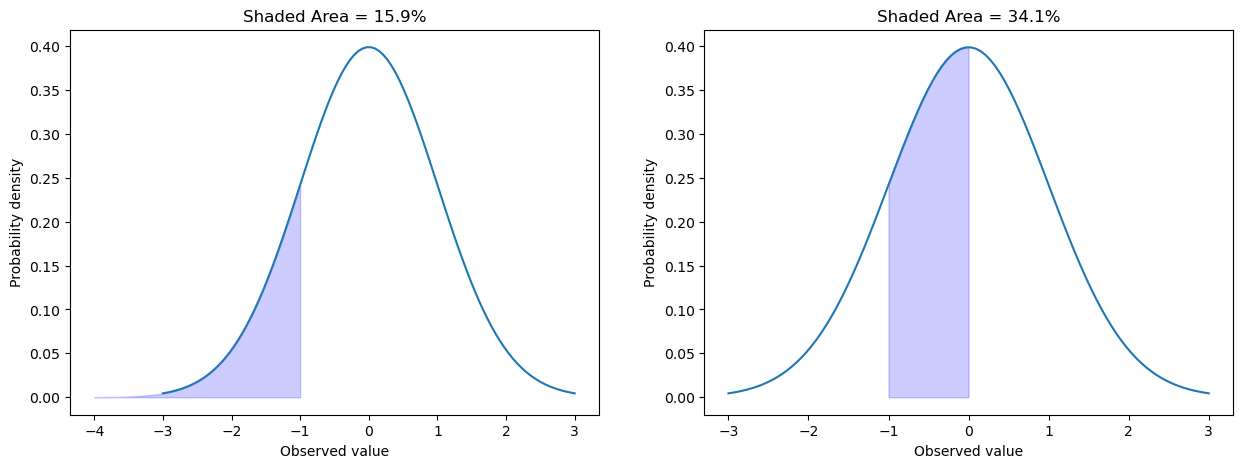

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

mu = 0
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[0])


sns.lineplot(x = x, y = stats.norm.pdf(x, mu, sigma), ax=axes[1])


x_fill1 = np.arange(-4, -1, 0.001)
x_fill2 = np.arange(-1, 0, 0.001)

y_fill1 = stats.norm.pdf(x_fill1,0,1)
y_fill2 = stats.norm.pdf(x_fill2,0,1)

axes[0].fill_between(x_fill1,y_fill1,0, alpha=0.2, color='blue')
axes[1].fill_between(x_fill2,y_fill2,0, alpha=0.2, color='blue')

axes[0].set_title("Shaded Area = 15.9%")
axes[1].set_title("Shaded Area = 34.1%")

axes[0].set(xlabel='Observed value', ylabel='Probability density')
axes[1].set(xlabel='Observed value', ylabel='Probability density')

In [60]:
stats.norm.pdf(1, 1, 0.1)

3.989422804014327

## T-Distribution

[Text(0.5, 0, 'Observed value'), Text(0, 0.5, 'Probability density')]

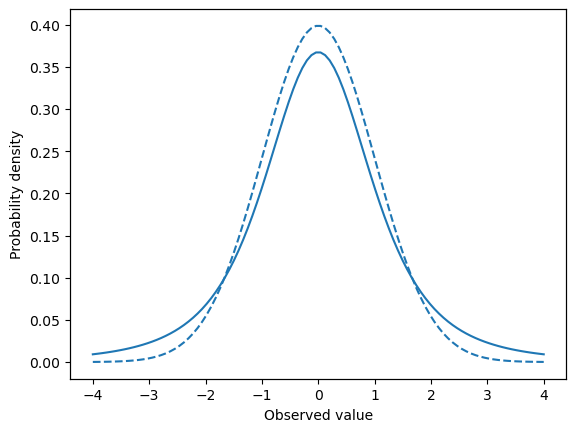

In [61]:
mu = 0
variance = 1
sigma = np.sqrt(variance)
dof = 3
x = np.linspace(-4*sigma, 4*sigma, 100)
y1 = stats.norm.pdf(x, mu, sigma)
y2 = stats.t.pdf(x, dof)

fig = sns.lineplot(x=x, y=y1, linestyle='--')
ax2 = fig.twiny()
ax2.tick_params(left=False, labelleft=False, top=False, labeltop=False,
                right=False, labelright=False, bottom=False, labelbottom=False)
sns.lineplot(x=x, y=y2, ax=ax2)
fig.set(xlabel='Observed value', ylabel='Probability density')

# $\chi^2$ distribution

[Text(0.5, 0, 'Observed value'), Text(0, 0.5, 'Probability density')]

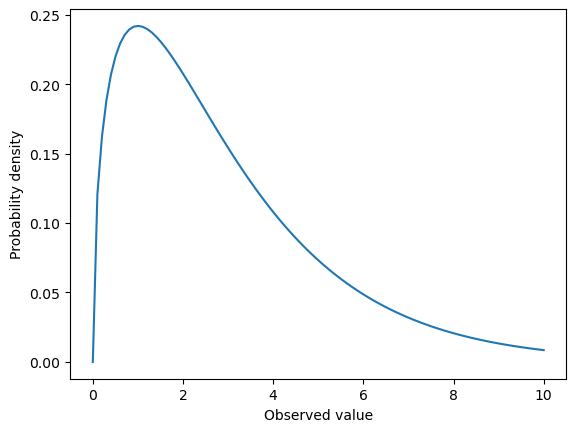

In [62]:
dof = 3
x = np.linspace(0,10,100)
y = stats.chi2.pdf(x, dof)
fig = sns.lineplot(x=x, y=y)
fig.set(xlabel='Observed value', ylabel='Probability density')

# $F$ distribution

[Text(0.5, 0, 'Observed value'), Text(0, 0.5, 'Probability density')]

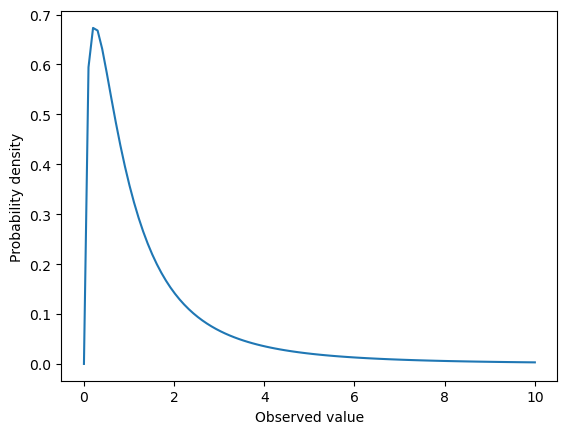

In [63]:
dof1 = 3
dof2 = 5
x = np.linspace(0, 10, 100)
y = stats.f.pdf(x, dof1, dof2)
fig = sns.lineplot(x=x, y=y)
fig.set(xlabel='Observed value', ylabel='Probability density')

# Relating Distributions

First, we’ll use the random.normal() function to generate 1000 normally-distributed observations:

In [69]:
mu = 0
sigma = 1
n = 1000

dist = np.random.normal(mu, sigma, n)
dist[0:10]

array([ 4.37184606e-01,  9.42166571e-01,  2.16227595e-03, -2.24402981e+00,
        1.71612220e-01, -1.75450223e-01, -8.57046610e-01,  8.05622312e-01,
       -9.56881212e-02,  1.32222654e+00])

<Axes: ylabel='Count'>

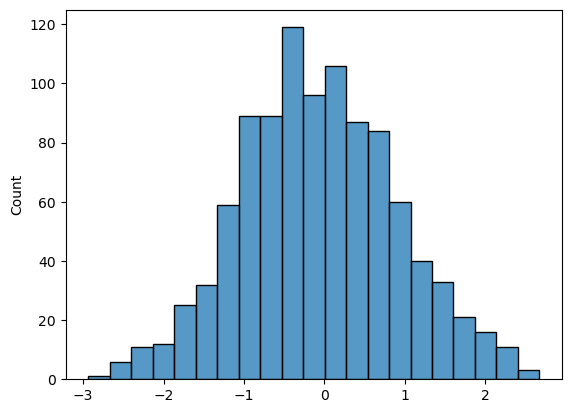

In [70]:
sns.histplot(dist)

<Axes: >

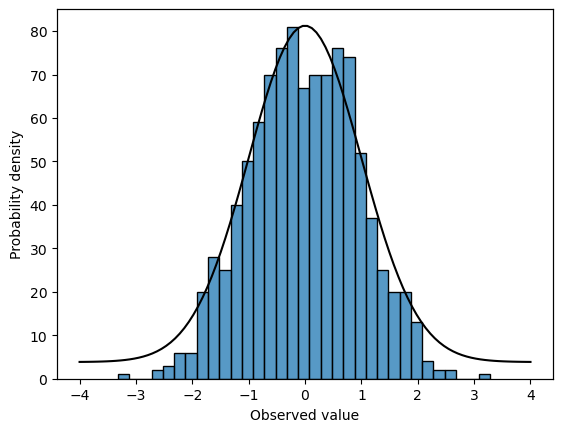

In [71]:
mu = 0
sigma = 1
n = 1000

dist = np.random.normal(mu, sigma, n)
x = np.linspace(-4,4,100)
y = stats.norm.pdf(x, mu, sigma)
fig = sns.histplot(dist, binwidth=0.2)
ax2 = fig.twinx()
ax2.tick_params(
    left=False, labelleft=False, top=False, labeltop=False,
    right=False, labelright=False, bottom=False, labelbottom=False  
)
fig.set(xlabel='Observed value', ylabel="Probability density")
sns.lineplot(x=x, y=y, ax=ax2, color='black')

In the previous example all I did was generate lots of normally distributed observations using `random.normal()` and then compared those to the true probability distribution in the figure (using `stats.norm.pdf()` to generate the black line in the figure. Now let’s try something trickier. We’ll try to generate some observations that follow a chi-square distribution with 3 degrees of freedom, but instead of using `stats.chi2.pdf()`, we’ll start with variables that are normally distributed, and see if we can exploit the known relationships between normal and chi-square distributions to do the work. As I mentioned earlier, a chi-square distribution with
degrees of freedom is what you get when you take
normally-distributed variables (with mean 0 and standard deviation 1), square them, and add them up. Since we want a chi-square distribution with 3 degrees of freedom, we’ll need to create three sets of normally-distributed data. Let’s call them `normal_a`, `normal_b`, and `normal_c`

In [72]:
normal_a = np.random.normal(0,1,1000)
normal_b = np.random.normal(0,1,1000)
normal_c = np.random.normal(0,1,1000)

Now that we’ve done that, the theory says we should square these and add them together, like this

In [73]:
chi_square_data = np.square(normal_a) + np.square(normal_b) + np.square(normal_c) 

and the resulting `chi_square_data` variable should contain 1000 observations that follow a chi-square distribution with 3 degrees of freedom. You can use the `sns.histplot()` function to have a look at these observations yourself, using a command like this,

<Axes: ylabel='Count'>

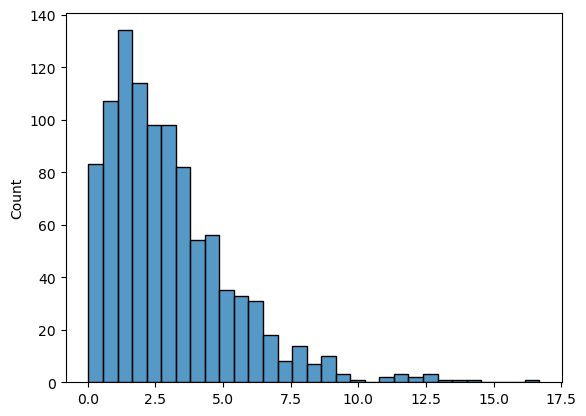

In [74]:
sns.histplot(chi_square_data)

[Text(0.5, 0, 'Observed value'), Text(0, 0.5, 'Probability density')]

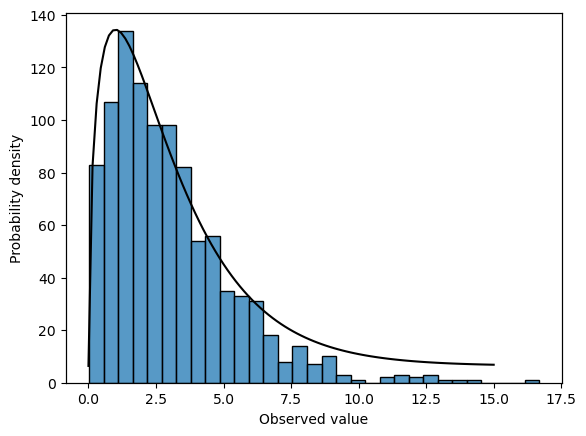

In [76]:
x = np.linspace(0, 15, 100)
y = stats.chi2.pdf(x, 3)

fig = sns.histplot(chi_square_data)
ax2 = fig.twinx()
sns.lineplot(x=x, y=y, ax=ax2, color="black")
ax2.tick_params(
    left=False, labelleft=False, top=False, labeltop=False,
    right=False, labelright=False, bottom=False, labelbottom=False  
)
fig.set(xlabel='Observed value', ylabel="Probability density")

We can extend this demonstration to the $t$ distribution and the $F$ distribution. Earlier, I implied that the $t$
distribution is related to the normal distribution when the standard deviation is unknown. That’s certainly true, and that’s the what we’ll see later on in the chapter on Comparing two means, but there’s a somewhat more precise relationship between the normal, chi-square and $t$ distributions. Suppose we “scale” our chi-square data by dividing it by the degrees of freedom, like so:

In [77]:
scaled_chi_square_data = chi_square_data / 3

[Text(0.5, 0, 'Observed value'), Text(0, 0.5, 'Probability density')]

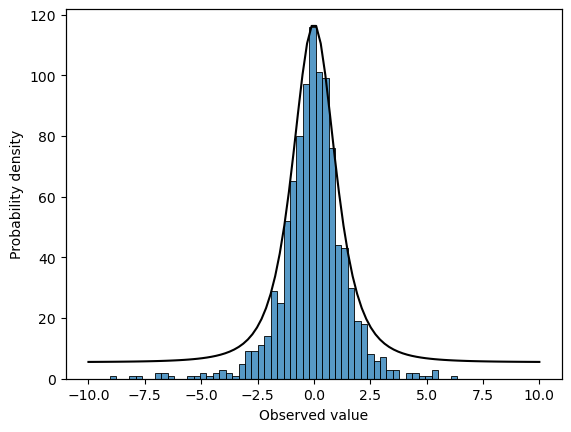

In [79]:
normal_d = np.random.normal(0,1,1000)
t_3 = normal_d / np.sqrt(scaled_chi_square_data)
fig = sns.histplot(t_3)
x = np.linspace(-10,10,100)
y = stats.t.pdf(x, 3)
ax2 = fig.twinx()
sns.lineplot(x=x, y=y, ax=ax2, color='black')
ax2.tick_params(
    left=False, labelleft=False, top=False, labeltop=False,
    right=False, labelright=False, bottom=False, labelbottom=False  
)
fig.set(xlabel='Observed value', ylabel="Probability density")

Similarly, we can obtain an $F$ distribution by taking the ratio between two scaled chi-square distributions. Suppose, for instance, we wanted to generate data from an $F$ distribution with 3 and 20 degrees of freedom. We could do this using `numpy.random.f()`, but we could also do the same thing by generating two chi-square variables, one with 3 degrees of freedom, and the other with 20 degrees of freedom. As the example with `chi_square_data` illustrates, we can actually do this using `numpy.random.normal()` if we really want to, but this time I’ll take a short cut:

In [80]:
chi_square_3 = np.random.chisquare(3, 1000)
chi_square_20 = np.random.chisquare(20, 1000)

In [81]:
scaled_chi_square_3 = chi_square_3 / 3
scaled_chi_square_20 = chi_square_20 / 20

[Text(0.5, 0, 'Observed value'), Text(0, 0.5, 'Probability density')]

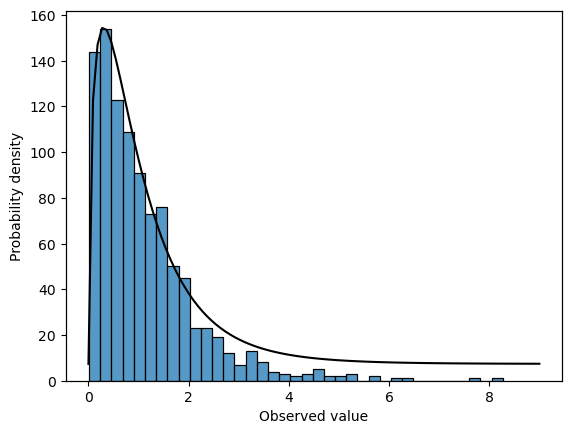

In [83]:
f_3_20 = scaled_chi_square_3 / scaled_chi_square_20
fig = sns.histplot(f_3_20)
x = np.linspace(0, 9, 100)
y = stats.f.pdf(x, 3, 20)
ax2 = fig.twinx()
sns.lineplot(x=x, y=y, ax=ax2, color='black')
ax2.tick_params(
    left=False, labelleft=False, top=False, labeltop=False,
    right=False, labelright=False, bottom=False, labelbottom=False  
)
fig.set(xlabel='Observed value', ylabel="Probability density")